## Sagnac Frequency - Westring Spectra

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import log10

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
config = {}

config['seeds'] = ["BW.DROMY..FJV"]

config['path_to_sds'] = archive_path+"romy_archive/"

config['tbeg'] = UTCDateTime("2023-06-02 00:00")
config['tend'] = UTCDateTime("2023-06-02 08:00")


## Load Data

In [ ]:
from andbro__read_sds import __read_sds
from obspy import Stream, UTCDateTime

st0 = Stream()

for seed in config['seeds']:

    print(f" -> loading {seed}...")
    
    try:
        st00 = __read_sds(config['path_to_sds'], seed, config['tbeg'], config['tend'], data_format='MSEED')
    except:
        print(f" -> failed for {seed}")
        
    st0 += st00

st0 = st0.sort() 
   
for tr in st0:
    tr.data = tr.data*0.59604645e-6 # V / count  [0.59604645ug  from obsidian]
    
st0.plot(equal_scale=False);

 -> loading BW.DROMY..FJV...


### Load PSD Spectra

In [4]:
rv1 = read_pickle(data_path+"psd_2023-06-02_RV_sagnac_geoshardware_decreasingamplitude.pkl")
rv2 = read_pickle(data_path+"psd_2023-06-02_RV_sagnac_geoshardware_constantamplitude.pkl")
rv3 = read_pickle(data_path+"psd_2023-06-02_RV_sagnac_geoshardware_3hour.pkl")

## Plotting

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(15,10))

ax[0].plot(st0[0].times()/3600, st0[0].data, color="black")

ax[0].fill_betweenx([0,2], 0, 2, color="tab:orange", alpha=0.4)
ax[0].fill_betweenx([0,2], 2, 2.5, color="tab:green", alpha=0.4)
ax[0].fill_betweenx([0,2], 3, 6, color="tab:red", alpha=0.4)

ax[0].set_ylabel("Amp. (V)")
ax[0].set_xlabel("Time (hours)")

ax[1].semilogy(rv1.frequencies, rv1.fjz_psd, alpha=0.5, color="tab:orange")
ax[1].semilogy(rv2.frequencies, rv2.fjz_psd, alpha=0.5, color="tab:green")
ax[1].semilogy(rv3.frequencies, rv3.fjz_psd, alpha=0.5, color="tab:red")

ax[1].set_xlim(0, 2500)
ax[1].set_ylabel("PSD ($V^2 /HZ$)")
ax[1].set_xlabel("Frequency (Hz)")


ax[2].semilogy(rv1.frequencies, rv1.fjz_psd, alpha=0.5, color="tab:orange")
ax[2].semilogy(rv2.frequencies, rv2.fjz_psd, alpha=0.5, color="tab:green")
ax[2].semilogy(rv3.frequencies, rv3.fjz_psd, alpha=0.5, color="tab:red")

ax[2].set_xlim(300, 600)
ax[2].set_ylabel("PSD ($V^2 /HZ$)")
ax[2].set_xlabel("Frequency (Hz)")

plt.show();

In [5]:
rv4 = read_pickle(data_path+"psd_2023-06-04_RV_test2.pkl")
rv4['fjz_psd_db'] = 20*log10(rv4.fjz_psd)

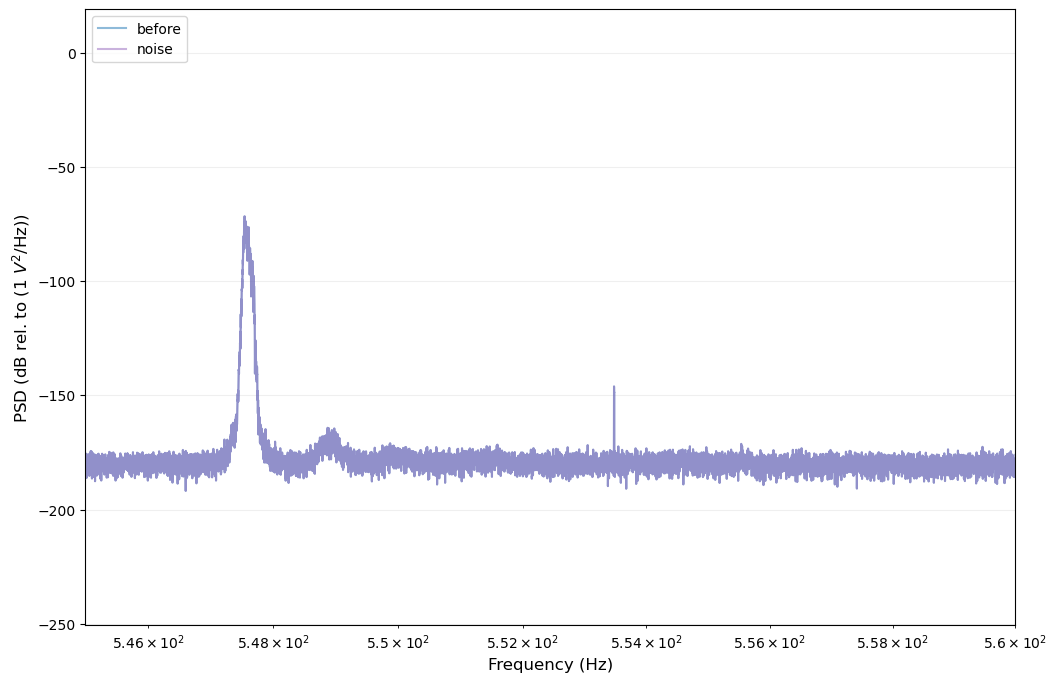

In [8]:
font = 12

fig, ax = plt.subplots(1,1,figsize=(12,8))


ax.semilogx(rv4.frequencies, rv4.fjz_psd_db, alpha=0.5, color="tab:blue", label="before")

ax.semilogx(rv4.frequencies, rv4.fjz_psd_db, alpha=0.5, color="tab:purple", label="noise")

plt.grid(alpha=0.2)
plt.xlim(1e-2, 2.5e3)
plt.xlim(545, 560)
plt.xlabel("Frequency (Hz)", fontsize=font)
plt.ylabel(f"PSD (dB rel. to (1 $V^2$/Hz))", fontsize=font)
plt.legend(loc=2)

plt.show();